# FE006 - Feature Engineering
-- Make Some Features to Identify Similar People

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
pd.set_option('max_columns', 100)
%matplotlib inline

In [2]:
train = pd.read_parquet('../../data/train_FE005.parquet')
test = pd.read_parquet('../../data/test_FE005.parquet')

In [8]:
train['Day_of_Year_Year'] = train['DT'].dt.dayofyear.astype('str').add('_') + train['DT'].dt.year.astype('str')
test['Day_of_Year_Year'] = test['DT'].dt.dayofyear.astype('str').add('_') + test['DT'].dt.year.astype('str')

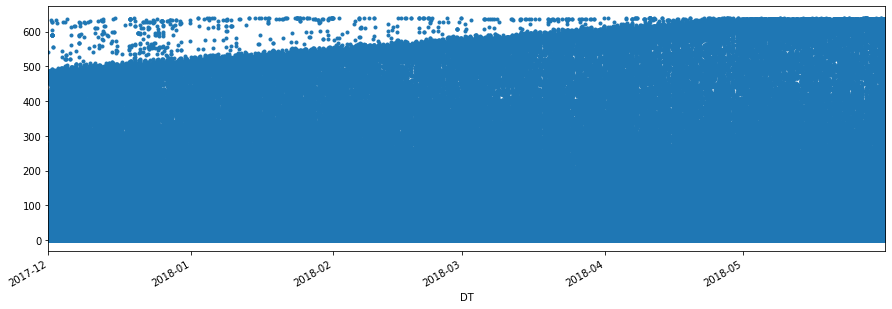

In [17]:
train.set_index('DT')['D1'].plot(figsize=(15, 5), style='.')

In [40]:
def make_day_dayofyear_features(df):
    for d in tqdm(range(1, 15)):
        df[f'TranAmt_div_Mean_D{d}_DOY'] = df['TransactionAmt'] / df.groupby([f'D{d}','Day_of_Year_Year'])['TransactionAmt'].transform('mean')
        df[f'card1_div_Mean_D{d}_DOY'] = df['card1'] / df.groupby([f'D{d}','Day_of_Year_Year'])['card1'].transform('mean')
        df[f'card2_div_Mean_D{d}_DOY'] = df['card2'] / df.groupby([f'D{d}','Day_of_Year_Year'])['card2'].transform('mean')
        df[f'card3_div_Mean_D{d}_DOY'] = df['card3'] / df.groupby([f'D{d}','Day_of_Year_Year'])['card3'].transform('mean')
        df[f'card4_div_Mean_D{d}_DOY'] = df['card4'] / df.groupby([f'D{d}','Day_of_Year_Year'])['card4'].transform('mean')
        df[f'card5_div_Mean_D{d}_DOY'] = df['card5'] / df.groupby([f'D{d}','Day_of_Year_Year'])['card5'].transform('mean')
        df[f'card6_div_Mean_D{d}_DOY'] = df['card6'] / df.groupby([f'D{d}','Day_of_Year_Year'])['card6'].transform('mean')
        df[f'addr1_div_Mean_D{d}_DOY'] = df['addr1'] / df.groupby([f'D{d}','Day_of_Year_Year'])['addr1'].transform('mean')
        df[f'addr2_div_Mean_D{d}_DOY'] = df['addr2'] / df.groupby([f'D{d}','Day_of_Year_Year'])['addr2'].transform('mean')
        df[f'dist1_div_Mean_D{d}_DOY'] = df['dist1'] / df.groupby([f'D{d}','Day_of_Year_Year'])['dist1'].transform('mean')
        df[f'dist2_div_Mean_D{d}_DOY'] = df['dist2'] / df.groupby([f'D{d}','Day_of_Year_Year'])['dist2'].transform('mean')
    for d in tqdm(range(1, 15)):
        df[f'TranAmt_div_Mean_D{d}_DOY_productCD'] = df['TransactionAmt'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['TransactionAmt'].transform('mean')
        df[f'card1_div_Mean_D{d}_DOY_productCD'] = df['card1'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['card1'].transform('mean')
        df[f'card2_div_Mean_D{d}_DOY_productCD'] = df['card2'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['card2'].transform('mean')
        df[f'card3_div_Mean_D{d}_DOY_productCD'] = df['card3'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['card3'].transform('mean')
        df[f'card4_div_Mean_D{d}_DOY_productCD'] = df['card4'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['card4'].transform('mean')
        df[f'card5_div_Mean_D{d}_DOY_productCD'] = df['card5'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['card5'].transform('mean')
        df[f'card6_div_Mean_D{d}_DOY_productCD'] = df['card6'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['card6'].transform('mean')
        df[f'addr1_div_Mean_D{d}_DOY_productCD'] = df['addr1'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['addr1'].transform('mean')
        df[f'addr2_div_Mean_D{d}_DOY_productCD'] = df['addr2'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['addr2'].transform('mean')
        df[f'dist1_div_Mean_D{d}_DOY_productCD'] = df['dist1'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['dist1'].transform('mean')
        df[f'dist2_div_Mean_D{d}_DOY_productCD'] = df['dist2'] / df.groupby([f'D{d}','Day_of_Year_Year','ProductCD'])['dist2'].transform('mean')
    return df

In [41]:
train = make_day_dayofyear_features(train)
test = make_day_dayofyear_features(test)

100%|██████████| 14/14 [02:55<00:00, 13.04s/it]


In [42]:
train.to_parquet('../../data/train_FE006.parquet')
test.to_parquet('../../data/test_FE006.parquet')